# Linear Regression
 SonAn Nguyen
 
 - <a href=#bookmark1>Linear Regression with 1 variable</a>
 - <a href=#bookmark2>Linear Regression with 2 variables</a>

Defining the functions for Linear Regression which include:
    1. Cost function: define the different btw y and estimated y
    2. Gradient Descent: algorithm to find the minimun theta
    3. Normal Equation: algorithm to find the minimun theta by solving the derivative of y and getting the closed-form solution
    4. Normalizing X - variables: to get a better data-set for Gradient descent.

In [27]:
#Importting the library
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d


# Cost fucntion of linear regression
def CostfuncLinear(X,y,theta): 
    m = y.shape[0]    
    J = (1/(2*m))*np.sum((np.dot(X,theta) - y)*(np.dot(X,theta) - y))
    return J
  
# Gradient Descent
def GD(X,y,theta,alpha,num_iters): 
    m = y.shape[0]
    #J_history = [] #storing the history of theta - optional
    for iter in range(num_iters):
        h = np.dot(X,theta)
        theta = theta - alpha*(1/m)*np.dot(X.T,(h-y))
        #J_history.append(float(Costfunc(X,y,theta)))
    return theta

 #NormalEqn(X,y) Computes the closed-form solution to linear regression
def NormalEqn(X,y):
    return np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,y))

# normalizing the initial X
def featureNormalized(X): 
    m = X.shape[1]
    for x in range(m):
        X.T[[x]] = np.true_divide((X.T[[x]]-np.mean(X.T[[x]])),np.std(X.T[[x]]))
    return X


<a name='bookmark1' />
### Example 1 - Linear Regression with 1 variable 

In [17]:
# Example #1
#Import from .txt file , from ex1data1 or ex1data2
X = []
y = []
with open('ex1data1.txt', 'r') as f:
    content = f.readlines()
    for x in content:
        row = x.split(',')
        X.append(float(row[0]))
        y.append(float(row[1]))
initial_theta = np.zeros((2, 1))
X = np.array([X]).T
y = np.array([y]).T
# height (cm) X_height vs  weight (kg) y_weight
X_height = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
y_weight = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

X_Normalized = featureNormalized(X)

#adding col ones for theta_0
one = np.ones(( 1, X.shape[1])) 
X_Normalized = np.append(np.ones(( X_Normalized.shape[0],1)), X, axis = 1)
X = np.append(np.ones(( X.shape[0],1)), X, axis = 1)
X_height = np.append(np.ones(( X_height.shape[0],1)), X_height, axis = 1) 

num_iters = 1500
alpha = 0.01

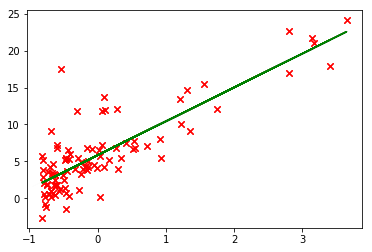

In [12]:

plt.plot((X.T[[1]]).T,y,'rx')
theta_GD = GD(X,y,initial_theta,alpha,num_iters)
theta_Normal = NormalEqn(X,y)
theta_Normalized = NormalEqn(X_Normalized,y)
plt.plot((X.T[[1]]).T,y,'rx',(X.T[[1]]).T,np.dot(X,theta_GD),'b-')
plt.plot((X.T[[1]]).T,y,'rx',(X.T[[1]]).T,np.dot(X,theta_Normal),'y-')
plt.plot((X.T[[1]]).T,y,'rx',(X.T[[1]]).T,np.dot(X,theta_Normalized),'g-')

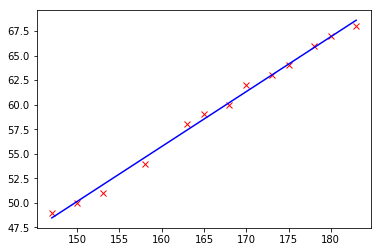

In [18]:
theta_Normal = NormalEqn(X_height,y_weight)
plt.plot((X_height.T[[1]]).T,y_weight,'rx',(X_height.T[[1]]).T,np.dot(X_height,theta_Normal),'b-')

<a name='bookmark2' />
### Example 2 - Linear Regression with 2 variables

In [9]:
# An example 2
X1 = []
X2 = []
y = []
with open('ex1data2.txt', 'r') as f:
    content = f.readlines()
    for x in content:
        row = x.split(',')
        X1.append(float(row[0]))
        X2.append(float(row[1]))
        y.append(float(row[2]))
theta = np.zeros((2, 1))
X1 = np.array([X1]).T
X2 = np.array([X2]).T
X = np.concatenate((X1,X2),axis=1)
y = np.array([y]).T

# Normalized the X give the better feature to run Gradient Descent
X_Normalized = featureNormalized(X)

# Adding value for theta_0 = 1
X = np.append(np.ones(( X.shape[0],1)), X, axis = 1)
X_Normalized = np.append(np.ones(( X_Normalized.shape[0],1)), X_Normalized, axis = 1)
# Choose some alpha value
alpha = 0.01;
num_iters = 400;

# Init Theta and Run Gradient Descent 
initial_theta = np.zeros((3, 1))

In [13]:
theta_GD = GD(X_Normalized,y,initial_theta,alpha,num_iters)
theta_Normal = NormalEqn(X,y)

In [14]:
theta_Normal

array([[89597.90954355],
       [  139.21067402],
       [-8738.01911255]])

In [15]:
theta_GD

array([[334302.06399328],
       [ 99411.44947359],
       [  3267.01285407]])

<a name='bookmark3' />
### Coordinates Plotting

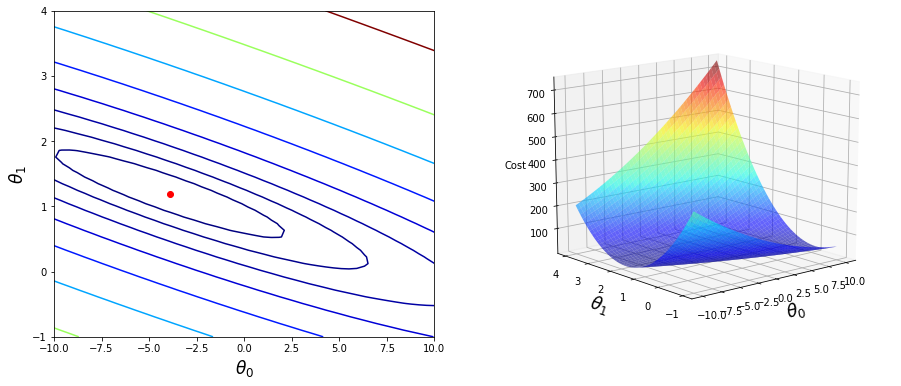

In [29]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

theta = NormalEqn(X,y)

# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = CostfuncLinear(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)